# 딥러닝 구조 연습

* 섭씨 -> 화씨
* 공식: T(화씨) = T(섭씨) * 9/5 + 32
* 섭씨와 화씨의 관계는 위의 공식에 의해 이미 알고 있는 내용이다.
* 텐서플로우는 썹씨와 화씨의 데이터를 통해 어떤 방정식을 만들어 내는지 알아봅시다.

In [1]:
import tensorflow
tensorflow.__version__

'2.10.0'

## 딥러닝 구성하는 순서

신경망 생성 -> 모델 compile -> 모델 fit -> 모델 predict -> 모델 저장(save)

## 라이브러리 로드

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

## 데이터 로드

In [3]:
temp_df = pd.read_csv('./data/Celsius-to-Fahrenheit.csv')
temp_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [4]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


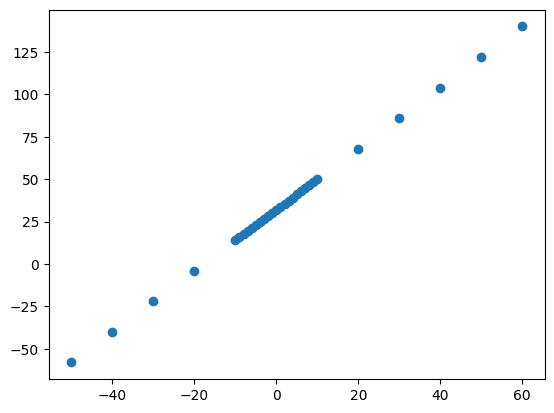

In [6]:
plt.scatter(temp_df['Celsius'],temp_df['Fahrenheit'])

## 데이터 준비

In [7]:
x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

In [8]:
x_train.shape

(30,)

In [9]:
y_train.shape

(30,)

## 딥러닝 구성하기

model = Sequential() :  입력층, 은닉층, 출력층을 차곡차곡 쌓아서 순서대로 실행되도록 하는 모델 생성

```python
Dense(노드 갯수, input_dim=입력 갯수)
```


**[참고]**
tensorflow에서 모델을 생성하는 방법
1. Sequential : 해결하려는 문제들에 대해서 95%정도 처리가 가능
2. Functional : Sequential한 방법으로도 해결되지 않을 경우에 적용
3. Subclass Google에서도 추천하지 않는 방법, 모델을 실제로 깊이 있게 연구하는 사람

In [10]:
# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
# 딥러닝 모델 생성

model = Sequential()

In [11]:
model.add(Dense(units=1, input_dim=1))

In [ ]:
#입력1개, 유닛1개인 Dense층 구성
# model.add(Dense(units=1, input_shape=[1]))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 딥러닝 설정하기

* 지정한 모델이 효과적으로 구현될 수 있게 환경을 설정해주는 부분
* 손실함수, 경사하강법,평가지표 등의 정보 설정


* 오차를 어떻게 측정할껀데? 손실함수
* 오차를 가중치에 어떻게 적용할껀데? 경사하강법

In [18]:
# 딥러닝을 설정합니다.
# 회귀이기 때문에 손실함수는 MSE
# 경사하강법은 일반적으로 성능이 제일 좋다는 아담.

# model.compile(loss='mean_squared_error',optimizer='Adam') #기본 학습률: 0.001
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.5))


## 딥러닝 훈련하기

In [19]:
# epochs = 모든 샘플에 대해 한 번 훈련하는 것을 1에포크, 모든 샘플을 100번 재사용해서 훈련하라

epoch_hist = model.fit(x_train,y_train,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 294ms/step - loss: 2491.4583
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 1718.4078
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 1209.1351
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 950.3584
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 899.2365
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 975.2943
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 1079.2565
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 1136.0758
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 1119.2582
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 1040.3469
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 927.7109
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 811.4388
Epoch 13/100
1/1 [==========

In [ ]:
# batch_size = 샘플을 한 번에 몇 개씩 처리할 것인지 정하는 부분, 30개 샘플 중에서 10개씩 끊어서 집어넣어라.
# batch_size가 너무 크면 속도 저하, 너무 작으면 실행 값의 편차가 생겨 불안정해짐.

# epoch_hist = model.fit(x_train, y_train, epochs=100,batch_size=10)

In [20]:
#학습끝나고
#평가하자

epoch_hist.history.keys()

dict_keys(['loss'])

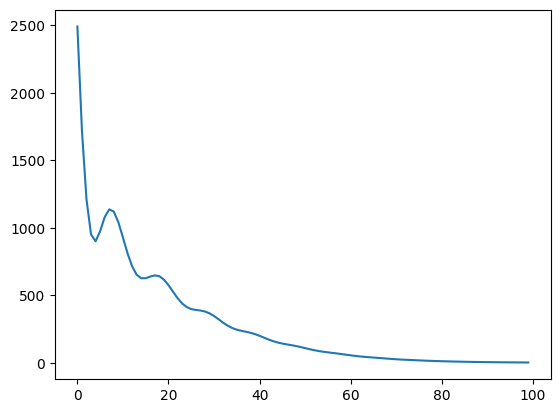

In [21]:
plt.plot(epoch_hist.history['loss'])

## 평가하기

In [22]:
model.evaluate(x_train,y_train)

1/1 [==============================] - 0s 79ms/step - loss: 1.3339


1.3339006900787354

## 예측하기

In [24]:
#T(화씨) = T(섭씨) * 9/5 + 32
Temp_c = 0

pred_temp = model.predict([Temp_c]) #예측값

real_temp = Temp_c *(9/5) + 32 #실제값


pred_temp , real_temp

1/1 [==============================] - 0s 59ms/step


(array([[30.848948]], dtype=float32), 32.0)

## 전체 코드

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#데이터 로드
temp_df = pd.read_csv('./data/Celsius-to-Fahrenheit.csv')
x_train = temp_df['Celsius']
y_train= temp_df['Fahrenheit']

# 딥러닝 모델 생성
model = Sequential()

#입력1개, 유닛1개인 Dense층 구성
model.add(Dense(units=1, input_dim=1 ))

#설정하기
# model.compile(optimizer='Adam',loss='mean_squared_error')
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.5))

#훈련하기
epoch_hist = model.fit(x_train, y_train, epochs=100)

#평가하기
model.evaluate(x_train, y_train)



Epoch 1/100
1/1 [==============================] - 0s 214ms/step - loss: 7285.6963
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 5594.0044
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 4166.5107
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 3004.7346
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 2105.2925
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 1458.0364
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 1044.1538
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 834.6398
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 790.0253
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 862.3722
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 999.9607
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 1153.8892
Epoch 13/100
1/1 [=========

1.9504998922348022

In [2]:
#예측하기
Temp_c = 0
Temp_f = model.predict([Temp_c]) # 입력 데이터의 shape 고려해서.....
print("predict={}   real={}".format(Temp_f,9/5*Temp_c + 32))

1/1 [==============================] - 0s 72ms/step
predict=[[30.621578]]   real=32.0


## 성능향상

In [3]:
#에포크를 더 늘리면..
epoch_hist = model.fit(x_train, y_train, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 5ms/step - loss: 1.9505
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 1.7128
Epoch 3/300
1/1 [==============================] - 0s 3ms/step - loss: 1.5095
Epoch 4/300
1/1 [==============================] - 0s 4ms/step - loss: 1.3405
Epoch 5/300
1/1 [==============================] - 0s 3ms/step - loss: 1.2010
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0834
Epoch 7/300
1/1 [==============================] - 0s 3ms/step - loss: 0.9794
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 0.8821
Epoch 9/300
1/1 [==============================] - 0s 3ms/step - loss: 0.7872
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 0.6937
Epoch 11/300
1/1 [==============================] - 0s 4ms/step - loss: 0.6032
Epoch 12/300
1/1 [==============================] - 0s 6ms/step - loss: 0.5186
Epoch 13/300
1/1 [==============================] - 0s 4ms/st

In [4]:
#예측하기
Temp_c = 0
Temp_f = model.predict([Temp_c]) # 입력 데이터의 shape 고려해서.....
print("predict={}   real={}".format(Temp_f,9/5*Temp_c + 32))

1/1 [==============================] - 0s 43ms/step
predict=[[32.000027]]   real=32.0


In [6]:
9/5

1.8

In [5]:
model.get_weights() # 학습결과: 가중치와 바이어스

[array([[1.7999998]], dtype=float32), array([32.000027], dtype=float32)]